# Question 1

Occupations

Step 1. Import the necessary libraries

In [3]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users

In [10]:
users = pd.read_csv("User.csv")
users = users.iloc[:, :5] # Remove unnecessary columns (Unnamed columns)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation

In [12]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("Mean Age per Occupation:\n", mean_age_per_occupation)

Mean Age per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [14]:
# Calculate male ratio per occupation and sort in descending order
male_ratio_per_occupation = (users[users['gender'] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()) * 100
sorted_male_ratio = male_ratio_per_occupation.sort_values(ascending=False)

# Print the sorted male ratio per occupation
print("Male Ratio per Occupation (Descending Order):\n", sorted_male_ratio)

Male Ratio per Occupation (Descending Order):
 occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64


Step 6. For each occupation, calculate the minimum and maximum ages

In [15]:
age_range_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nAge Range per Occupation:\n", age_range_per_occupation)


Age Range per Occupation:
                min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


Step 7. For each combination of occupation and sex, calculate the mean age

In [16]:
mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean Age per Combination of Occupation and Sex:\n", mean_age_per_combination)


Mean Age per Combination of Occupation and Sex:
 occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M  

Step 8. For each occupation present the percentage of women and men

In [17]:
gender_percentage_per_occupation = (users.groupby(['occupation', 'gender'])['gender'].count() / users.groupby('occupation')['gender'].count() * 100)
print("\nGender Percentage per Occupation:\n", gender_percentage_per_occupation)


Gender Percentage per Occupation:
 occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
      

# Question 2

Euro Teams

Step 1. Import the necessary libraries

In [18]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

In [19]:
euro12 = pd.read_csv("Euro_2012TEAM.csv")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.90%,16.00%,32,0,0,0,...,13,81.30%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.90%,12.90%,39,0,0,0,...,9,60.10%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.00%,20.00%,27,1,0,0,...,10,66.70%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.00%,17.20%,40,0,0,0,...,22,88.10%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.90%,6.50%,65,1,0,0,...,6,54.60%,36,51,5,6,0,11,11,19


Step 4. Select only the Goal column

In [23]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [24]:
euro12['Team'].nunique()

16

Step 6. What is the number of columns in the dataset?

In [25]:
len(euro12.columns)

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [29]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline DataFrame (Team, Yellow Cards, Red Cards):\n", discipline)


Discipline DataFrame (Team, Yellow Cards, Red Cards):
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [35]:
sorted_discipline = euro12.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print("Teams sorted by Red Cards, then by Yellow Cards:\n", sorted_discipline[['Team', 'Red Cards', 'Yellow Cards']])

Teams sorted by Red Cards, then by Yellow Cards:
                    Team  Red Cards  Yellow Cards
6                Greece          1             9
9                Poland          1             7
11  Republic of Ireland          1             6
7                 Italy          0            16
10             Portugal          0            12
13                Spain          0            11
0               Croatia          0             9
1        Czech Republic          0             7
14               Sweden          0             7
4                France          0             6
12               Russia          0             6
3               England          0             5
8           Netherlands          0             5
15              Ukraine          0             5
2               Denmark          0             4
5               Germany          0             4


Step 9. Calculate the mean Yellow Cards given per Team

In [37]:
mean_yellow_cards_per_team = euro12['Yellow Cards'].mean()
print("\nMean Yellow Cards given per Team:", mean_yellow_cards_per_team)


Mean Yellow Cards given per Team: 7.4375


Step 10. Filter teams that scored more than 6 goals

In [41]:
euro12[euro12['Goals']>6]['Team']

5     Germany
13      Spain
Name: Team, dtype: object

Step 11. Select the teams that start 
with G

In [45]:
euro12[euro12['Team'].str.startswith('G')]['Team']

5    Germany
6     Greece
Name: Team, dtype: object

Step 12. Select the first 7 columns

In [46]:
euro12.iloc[:, : 7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.90%,16.00%,32
1,Czech Republic,4,13,18,41.90%,12.90%,39
2,Denmark,4,10,10,50.00%,20.00%,27
3,England,5,11,18,50.00%,17.20%,40
4,France,3,22,24,37.90%,6.50%,65
5,Germany,10,32,32,47.80%,15.60%,80
6,Greece,5,8,18,30.70%,19.20%,32
7,Italy,6,34,45,43.00%,7.50%,110
8,Netherlands,2,12,36,25.00%,4.10%,60
9,Poland,2,15,23,39.40%,5.20%,48


Step 13. Select all columns except the last 3

In [47]:
euro12.iloc[ : , : -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.90%,16.00%,32,0,0,0,...,0,10,3,13,81.30%,41,62,2,9,0
1,Czech Republic,4,13,18,41.90%,12.90%,39,0,0,0,...,1,10,6,9,60.10%,53,73,8,7,0
2,Denmark,4,10,10,50.00%,20.00%,27,1,0,0,...,1,10,5,10,66.70%,25,38,8,4,0
3,England,5,11,18,50.00%,17.20%,40,0,0,0,...,2,29,3,22,88.10%,43,45,6,5,0
4,France,3,22,24,37.90%,6.50%,65,1,0,0,...,1,7,5,6,54.60%,36,51,5,6,0
5,Germany,10,32,32,47.80%,15.60%,80,2,1,0,...,1,11,6,10,62.60%,63,49,12,4,0
6,Greece,5,8,18,30.70%,19.20%,32,1,1,1,...,1,23,7,13,65.10%,67,48,12,9,1
7,Italy,6,34,45,43.00%,7.50%,110,2,0,0,...,2,18,7,20,74.10%,101,89,16,16,0
8,Netherlands,2,12,36,25.00%,4.10%,60,2,0,0,...,0,9,5,12,70.60%,35,30,3,5,0
9,Poland,2,15,23,39.40%,5.20%,48,0,0,0,...,0,8,3,6,66.70%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [48]:
euro12.loc[euro12.Team.isin(['England','Italy','Russia']),'Shooting Accuracy']

3     50.00%
7     43.00%
12    22.50%
Name: Shooting Accuracy, dtype: object

# Question 3

Housing

Step 1. Import the necessary libraries

In [49]:
import numpy as np
import pandas as pd

Step 2. Create 3 differents Series, each of length 100.

In [50]:
series_1 = pd.Series(np.random.randint(1, 5, size=100))
series_2 = pd.Series(np.random.randint(1, 4, size=100))
series_3 = pd.Series(np.random.randint(10000, 30001, size=100))   

Step 3. Create a DataFrame by joinning the Series by column

In [51]:
data_frame = pd.concat([series_1, series_2, series_3], axis=1)
data_frame

,0,1,2
0,3,3,29147
1,3,2,11399
2,1,2,16144
3,2,1,23769
4,1,3,14779
...,...,...,...
95,4,1,11998
96,4,3,23057
97,1,3,11826
98,3,3,23894


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [59]:
data_frame.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
data_frame

,bedrs,bathrs,price_sqr_meter
0,3,3,29147
1,3,2,11399
2,1,2,16144
3,2,1,23769
4,1,3,14779
...,...,...,...
95,4,1,11998
96,4,3,23057
97,1,3,11826
98,3,3,23894


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'

In [64]:
bigcolumn=pd.concat([series_1,series_2,series_3])
bigcolumn

0         3
1         3
2         1
3         2
4         1
      ...  
95    11998
96    23057
97    11826
98    23894
99    29694
Length: 300, dtype: int32

Step 6. Ops it seems it is going only until index 99. Is it true?

In [66]:
if bigcolumn.index.max() == 99:
    print("The index goes only up to 99.")
else:
    print("The index does not go only up to 99.")

The index goes only up to 99.


Step 7. Reindex the DataFrame so it goes from 0 to 299

In [69]:
bigcolumn.reset_index(drop=True)

0          3
1          3
2          1
3          2
4          1
       ...  
295    11998
296    23057
297    11826
298    23894
299    29694
Length: 300, dtype: int32

# Question 4

Wind Statistics

Step 1. Import the necessary libraries

In [111]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from the attached file wind.txt  


In [115]:
data = pd.read_csv("wind.csv")
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [116]:
data["Datetime"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data=data.drop(columns=["Yr","Mo","Dy"])

In [117]:
data["Datetime"]

0      2061-01-01
1      2061-01-02
2      2061-01-03
3      2061-01-04
4      2061-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: Datetime, Length: 6574, dtype: datetime64[ns]

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.

In [119]:
data["str"]=data["Datetime"].astype(str).str.slice(0,4)
data["str"]=data["str"].astype(int)
data["str"]=data["str"].apply(lambda x: x-100 if x > 2021 else x)

data["DateTime"]=data["str"].astype(str) + data["Datetime"].astype(str).str.slice(4,10) 
data.drop (["Datetime","str"],axis=1,inplace=True)

Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].

In [120]:
data["DateTime"].astype("datetime64[ns]")

0      1961-01-01
1      1961-01-02
2      1961-01-03
3      1961-01-04
4      1961-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: DateTime, Length: 6574, dtype: datetime64[ns]

In [121]:
data.set_index("DateTime",inplace=True)

Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.


In [122]:
data.isnull().sum().sum()

31

Step 7. Compute how many non-missing values there are in total.

In [123]:
data.notnull().sum().sum()

78857

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.A single number for the entire dataset.

In [124]:
data.mean().mean()

10.227982360836924

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.A different set of numbers for each location.

In [125]:
x=pd.Series(data.min())
y=pd.Series(data.max())
z=pd.Series(data.mean())
sd=pd.Series(data.std())

l=pd.concat([x,y,z,sd],axis=1).transpose()
loc_stats=pd.DataFrame(l)

loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
1,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
2,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
3,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day

In [126]:
x=pd.Series(data.min(axis=1),name="mean")
y=pd.Series(data.max(axis=1),name="max")
z=pd.Series(data.mean(axis=1),name="min")
sd=pd.Series(data.std(axis=1),name="std dev")

df=pd.merge(x,y,left_index=True,right_index=True)
df1=pd.merge(z,sd,left_index=True,right_index=True)
day_stats=df.join(df1)
day_stats

,mean,max,min,std dev
DateTime,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [127]:
d=data.reset_index()
d["DateTime"]=d["DateTime"].apply(pd.to_datetime)
d.set_index("DateTime",inplace=True)
jan=d[d.index.month == 1]
jan.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [128]:
print(d.resample('Y').mean())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
DateTime                                                                     
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

Step 13. Downsample the record to a monthly frequency for each location.

In [129]:
print(d.resample('M').mean())

                  RPT        VAL        ROS       KIL        SHA        BIR  \
DateTime                                                                      
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

Step 14. Downsample the record to a weekly frequency for each location.

In [130]:
print(d.resample('W').mean())

                  RPT        VAL        ROS        KIL        SHA        BIR  \
DateTime                                                                       
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [131]:
y=d[d.index.year==1961]
y1=d.resample('W').mean().apply(lambda x: x.describe())
y1

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,940.000000,940.000000,940.000000,940.000000,939.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,12.365304,10.647725,11.661255,6.309334,10.455607,7.094787,9.801271,8.496123,8.496452,8.710639,13.125912,15.597171
std,3.466600,3.372501,2.840361,2.186432,3.146715,2.556633,3.308180,2.853029,2.638349,2.924546,3.757189,4.468526
min,3.874286,2.452857,4.901429,1.447143,2.775714,1.382857,2.471429,2.284286,2.262857,1.571429,3.661429,5.124286
25%,9.884286,8.277857,9.613929,4.742857,8.248571,5.211071,7.432500,6.470000,6.589286,6.530000,10.346429,12.269286
50%,12.291429,10.486429,11.490000,6.165714,10.254286,6.933571,9.603571,8.358571,8.394286,8.490000,12.846429,15.330714
75%,14.547143,12.757857,13.457143,7.584286,12.627143,8.842500,11.942143,10.457500,10.108571,10.699643,15.513571,18.683929
max,24.010000,23.715714,21.384286,14.517143,22.897143,16.010000,20.474286,17.861429,17.460000,17.932857,26.617143,30.374286


# Question 5

Step 1. Import the necessary libraries

In [137]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

In [138]:
chipotle=pd.read_csv("chipotle.csv")

Step 4. See the first 10 entries

In [140]:
chipotle = chipotle.iloc[:, :5]
chipotle.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,[Tomatillo-Red Chili Salsa (Hot),NaN
5,3,1,Chicken Bowl,[Fresh Tomato Salsa (Mild),NaN
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,[Tomatillo Red Chili Salsa,NaN
8,4,1,Steak Soft Tacos,[Tomatillo Green Chili Salsa,NaN
9,5,1,Steak Burrito,[Fresh Tomato Salsa,NaN


Step 5. What is the number of observations in the dataset?

In [141]:
len(chipotle)

4622

Step 6. What is the number of columns in the dataset?

In [142]:
len(chipotle.columns)

5

Step 7. Print the name of all the columns.

In [143]:
chipotle.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [148]:
chipotle.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [149]:
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,[Tomatillo-Red Chili Salsa (Hot),NaN


In [150]:
chipotle.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

Step 10. For the most-ordered item, how many items were ordered?

In [155]:
chipotle.item_name.value_counts()[0]

726

Step 11. What was the most ordered item in the choice_description column?

In [156]:
chipotle.choice_description.value_counts().head(1)

[Fresh Tomato Salsa    1035
Name: choice_description, dtype: int64

Step 12. How many items were orderd in total

In [158]:
len(chipotle.item_name.unique())

50

Step 13. • Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type 

In [163]:
chipotle["item_price"].astype(float)

0       2.39
1       3.39
2       3.39
3       2.39
4        NaN
        ... 
4617     NaN
4618     NaN
4619     NaN
4620     NaN
4621     NaN
Name: item_price, Length: 4622, dtype: float64

In [164]:
chipotle["item_price"].dtype

dtype('float64')

In [165]:
chipotle["item_price"].apply(lambda x : pd.to_numeric(x))

0       2.39
1       3.39
2       3.39
3       2.39
4        NaN
        ... 
4617     NaN
4618     NaN
4619     NaN
4620     NaN
4621     NaN
Name: item_price, Length: 4622, dtype: float64

Step 14. How much was the revenue for the period in the dataset?

In [167]:
d=chipotle["item_price"]*chipotle["quantity"]
d.sum()

7489.9800000000005

Step 15. How many orders were made in the period?

In [168]:
l=len(chipotle["order_id"].unique())
l

1834

Step 16. What is the average revenue amount per order?

In [169]:
d.sum()/l

4.083958560523446

Step 17. How many different items are sold?

In [170]:
len(chipotle["item_name"].unique())

50

# Question 6

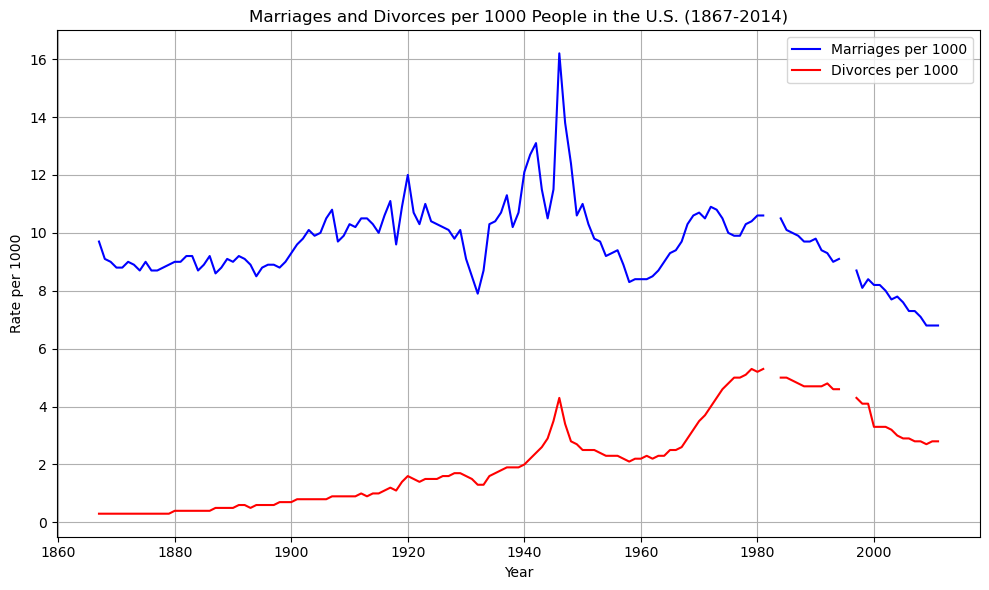

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV
data = pd.read_csv('us-marriages-divorces-1867-2014.csv') 

# Extract data from the DataFrame
years = data['Year']
marriages_per_1000 = data['Marriages_per_1000']
divorces_per_1000 = data['Divorces_per_1000']

plt.figure(figsize=(10, 6))
plt.plot(years, marriages_per_1000, label='Marriages per 1000', color='blue')
plt.plot(years, divorces_per_1000, label='Divorces per 1000', color='red')

plt.xlabel('Year')
plt.ylabel('Rate per 1000')
plt.title('Marriages and Divorces per 1000 People in the U.S. (1867-2014)')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()


# Question 7

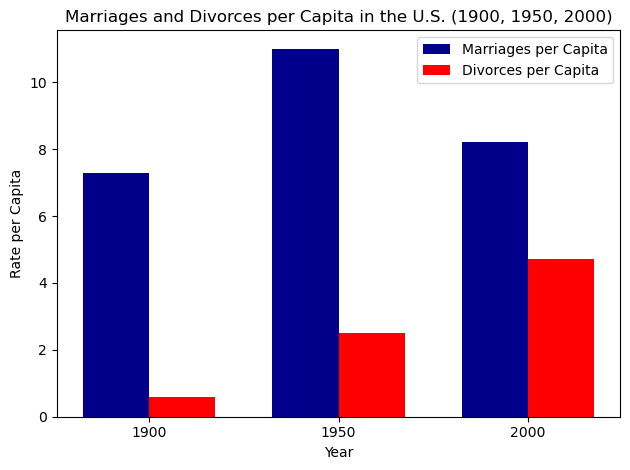

In [30]:
import matplotlib.pyplot as plt

years = [1900, 1950, 2000]
marriages_per_capita = [7.3, 11.0, 8.2]  # Example data (replace with actual data)
divorces_per_capita = [0.6, 2.5, 4.7]    # Example data (replace with actual data)

bar_width = 0.35
index = range(len(years))

plt.bar(index, marriages_per_capita, bar_width, label='Marriages per Capita', color='darkblue')
plt.bar([i + bar_width for i in index], divorces_per_capita, bar_width, label='Divorces per Capita', color='red')

plt.xlabel('Year')
plt.ylabel('Rate per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks([i + bar_width/2 for i in index], years)
plt.legend()

plt.tight_layout()

plt.show()


# Question 8

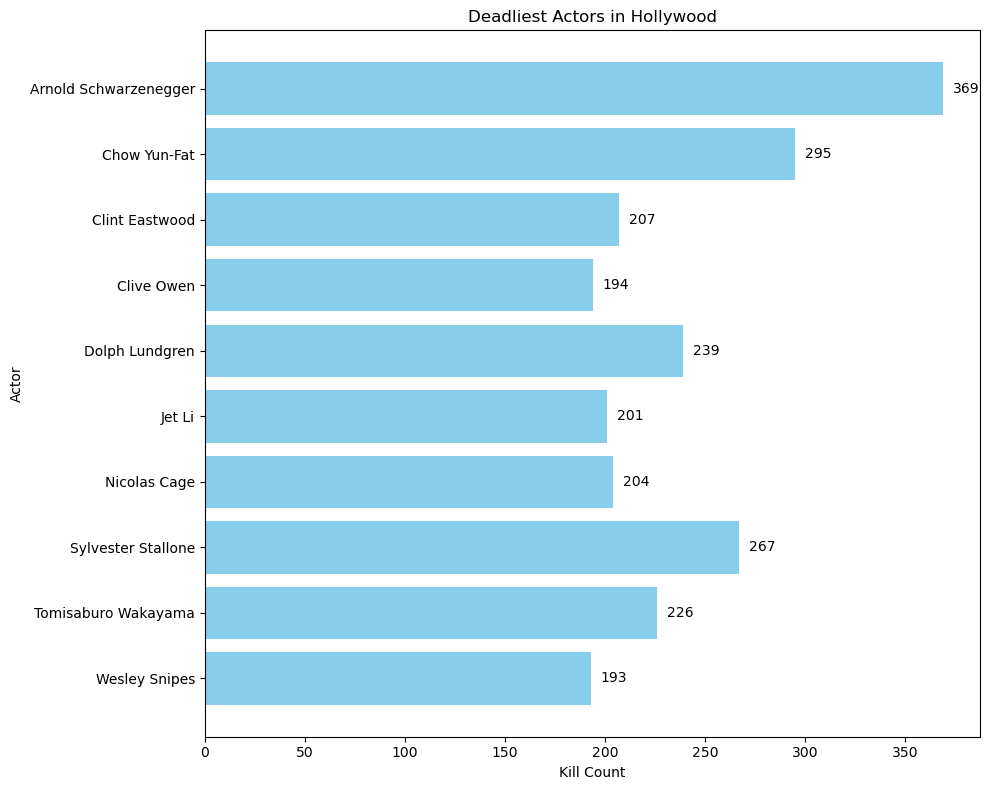

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV
data = pd.read_csv('actor_kill_counts.csv')

# Extract data from the DataFrame
actors = data['Actor']
kill_counts = data['Count']

plt.figure(figsize=(10, 8))
plt.barh(actors, kill_counts, color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Label each bar with the corresponding kill count
for i in range(len(actors)):
    plt.text(kill_counts[i] + 5, i, str(kill_counts[i]), va='center', color='black')

plt.tight_layout()

plt.show()


# Question 9

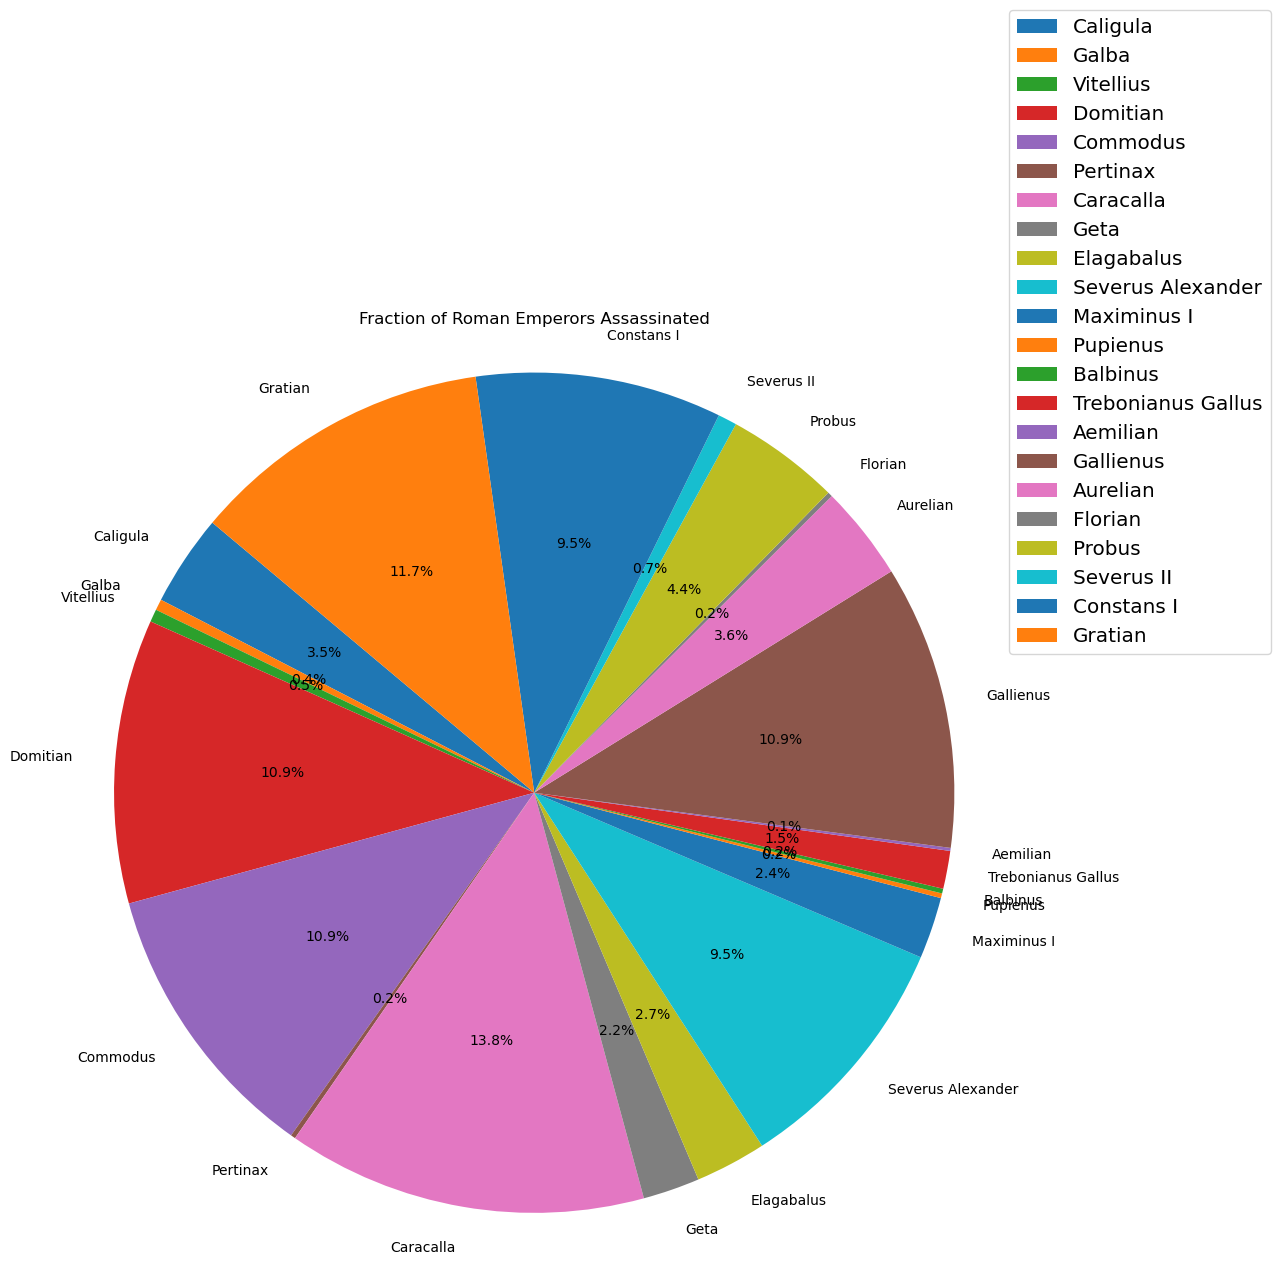

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV
data = pd.read_csv('roman-emperor-reigns.csv')

# Filter assassinated emperors
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']

# Create the pie chart
plt.figure(figsize=(12, 12))
assassinated_pie = plt.pie(
    assassinated_emperors['Length_of_Reign'],
    labels=assassinated_emperors['Emperor'],
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Fraction of Roman Emperors Assassinated')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adjust the legend size using the bbox_to_anchor parameter
plt.legend(bbox_to_anchor=(1, 1), loc='center left', labels=assassinated_emperors['Emperor'], fontsize='x-large')

plt.show()


# Question 10

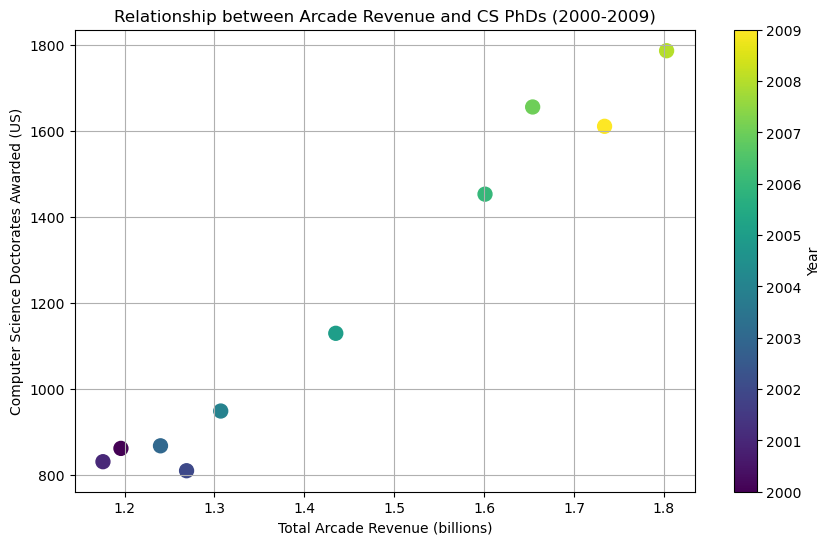

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['Total Arcade Revenue (billions)'],
    data['Computer Science Doctorates Awarded (US)'],
    c=data['Year'],  # Use year for color
    cmap='viridis',  # Choose a colormap
    s=100  # Marker size
)

plt.title('Relationship between Arcade Revenue and CS PhDs (2000-2009)')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

# Add a colorbar to indicate the years
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

plt.grid(True)
plt.show()
